<a href="https://colab.research.google.com/github/mostafa-sadeghi/amirali_eslami/blob/main/session_2_farvardin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install datasets


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import os
from datasets import load_dataset


## *Dataset Card for tiny-imagenet*
### **Dataset Summary**
Tiny ImageNet contains 100000 images of 200 classes (500 for each class) downsized to 64×64 colored images. Each class has 500 training images, 50 validation images, and 50 test images.

In [3]:
image_net_data = []
def load_imageNet_dataset():
    global image_net_data
    image_net_data = load_dataset('Maysee/tiny-imagenet', split='train')
 


load_imageNet_dataset()
print(type(image_net_data))

print(image_net_data[0])


<class 'datasets.arrow_dataset.Dataset'>
{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=64x64 at 0x7FF18B25DF40>, 'label': 0}


In [ ]:
print(image_net_data[0]['image'])
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

%matplotlib inline
# imshow(np.asarray(image_net_data[0]['image']))
np.asarray(image_net_data[0]['image'])

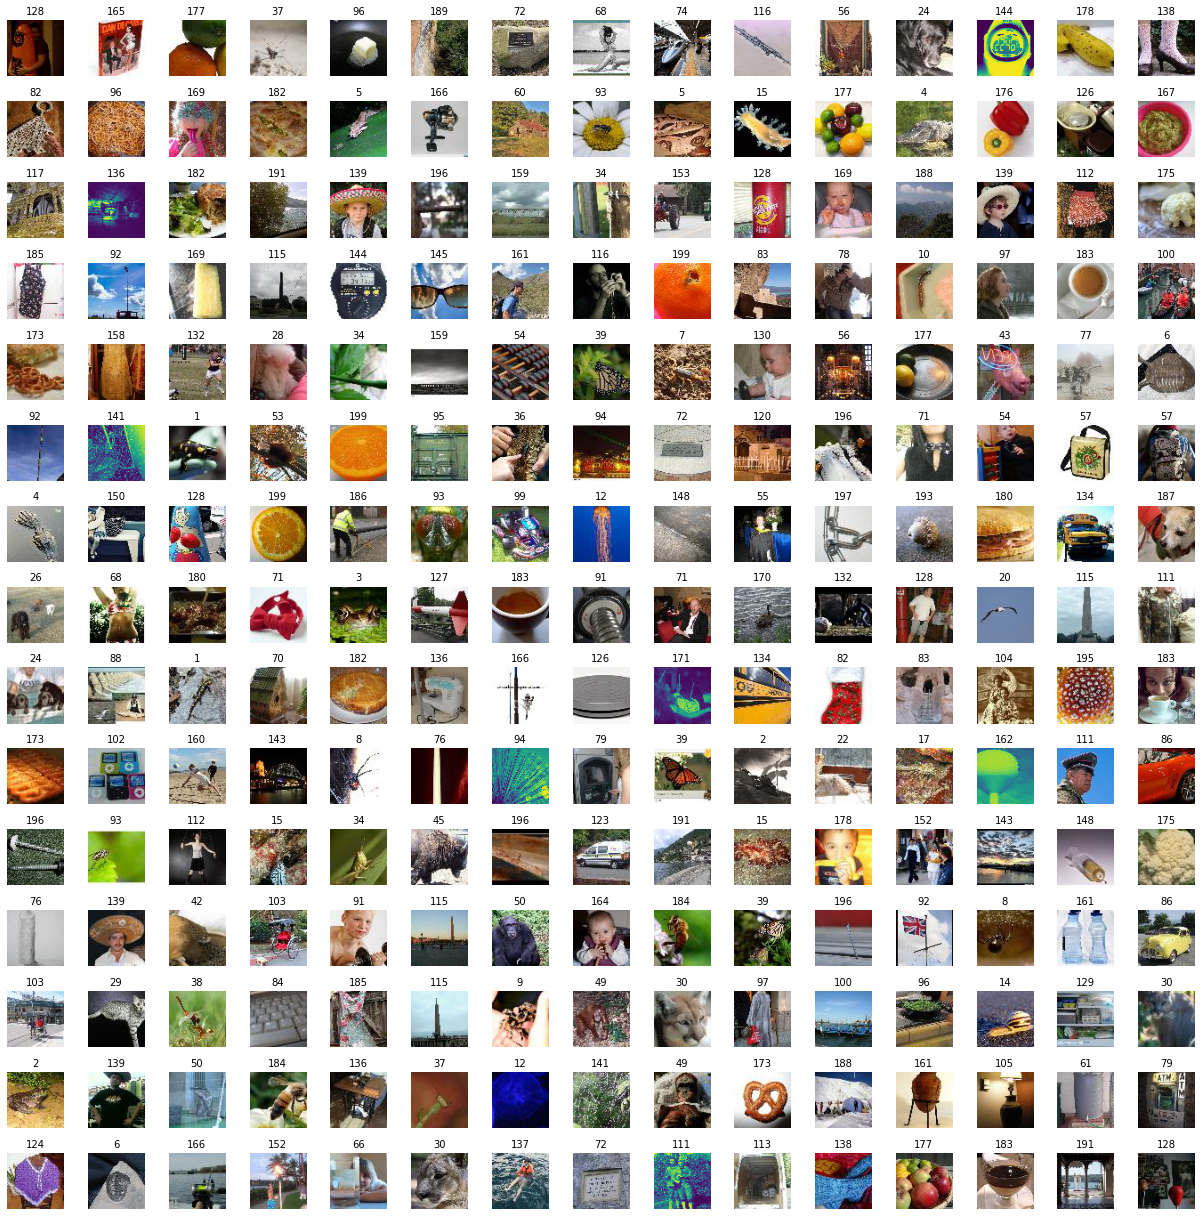

In [5]:
import matplotlib.pylab as plt
w_grid = 15
l_grid = 15

fig, axes = plt.subplots(w_grid,l_grid, figsize=(17,17))
axes = axes.ravel()
n_training = len(image_net_data)
for i in np.arange(0, w_grid * l_grid):
  index = np.random.randint(0, n_training)
 
  axes[i].imshow(np.asarray(image_net_data[index]['image']))
  axes[i].set_title(image_net_data[index]['label'], fontsize=10)
  axes[i].axis('off')
fig.tight_layout()

In [10]:
data = []
for i in range(len(image_net_data)):
  image = np.asarray(image_net_data[0]['image'])
  
  data.append(image)


In [11]:
len(data)

100000

In [ ]:
data[0].shape


(64, 64, 3)

In [ ]:
import classes


In [ ]:
classes.i2d

In [ ]:
print(len(classes.i2d))

82115


In [12]:
labels = [[i] * 500 for i in range(200)]
labels = np.array(labels)
labels = labels.ravel()
len(labels)

100000

In [ ]:
labels.shape

(100000,)

In [ ]:
labels[1000]

2

In [13]:
X = np.array(data)
type(X)

numpy.ndarray

In [14]:
y = np.array(labels)
type(y)

numpy.ndarray

In [ ]:
print(X.shape)
print(y.shape)

(100000, 64, 64, 3)
(100000,)


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state = 2)
X_train[0].shape

(64, 64, 3)

In [ ]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [ ]:
X_train_scaled[0].shape

(64, 64, 3)

In [ ]:
from tensorflow import keras


In [ ]:
model =keras.Sequential([
    keras.layers.Flatten(input_shape=(64,64,3)),
    keras.layers.Dense(1, activation='sigmoid', kernel_initializer='ones', bias_initializer='zeros')
    ])

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 12288)             0         
                                                                 
 dense_6 (Dense)             (None, 1)                 12289     
                                                                 
Total params: 12,289
Trainable params: 12,289
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs = 10)

Epoch 1/10
13/13 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 2/10
13/13 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 3/10
13/13 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 4/10
13/13 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 5/10
13/13 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 6/10
13/13 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 7/10
13/13 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 8/10
13/13 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 9/10
13/13 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 10/10
13/13 [==============================] - 0s 3ms/step - loss: 0.0000e+0

In [ ]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 1.0000


[0.0, 1.0]

In [ ]:
model.predict(X_test)

4/4 [==============================] - 0s 3ms/step


array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [ ]:
X_test.shape

(98, 64, 64, 3)

In [ ]:
coef, intercept = model.get_weights()
coef

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

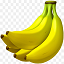

In [ ]:
img = cv2.imread('/content/sample_data/images/banana.png')
cv2_imshow(img)

In [ ]:
my_image_to_array = np.array(img)

In [ ]:
my_image_to_array.shape

(64, 64, 3)

In [ ]:
my_image_to_array = my_image_to_array/255

In [ ]:
my_image_to_array.shape

(64, 64, 3)

In [ ]:
my_image_to_array.shape

(64, 64, 3)

In [ ]:
my_image_to_array.reshape(1, 64, 64, 3)

array([[[[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [0.98039216, 0.98039216, 0.98039216],
         ...,
         [0.95294118, 0.95294118, 0.95294118],
         [0.93333333, 0.93333333, 0.93333333],
         [0.9372549 , 0.9372549 , 0.9372549 ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [0.98039216, 0.98039216, 0.98039216],
         ...,
         [0.95294118, 0.95294118, 0.95294118],
         [0.93333333, 0.93333333, 0.93333333],
         [0.9372549 , 0.9372549 , 0.9372549 ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [0.98431373, 0.98431373, 0.98431373],
         ...,
         [0.94901961, 0.94901961, 0.94901961],
         [0.9254902 , 0.9254902 , 0.9254902 ],
         [0.92941176, 0.92941176, 0.92941176]],

        ...,

        [[0.94901961, 0.94901961, 0.94901961],
         [0.94509804, 0.94509804, 0.94509804]

In [ ]:
my_image_to_array.shape

(64, 64, 3)

In [ ]:
my_image_to_array = np.expand_dims(my_image_to_array, axis=0)
my_image_to_array.shape

(1, 64, 64, 3)

In [ ]:
our_prediction = model.predict(my_image_to_array)

1/1 [==============================] - 0s 21ms/step


In [ ]:
our_prediction

array([[1.]], dtype=float32)